In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [146]:
csv_path_volumes = "/Users/joshuaalbiez/Documents/python/tachinidae_analyzer/data/extract_csv/df_volumes.csv"

In [147]:
df_volumes = pd.read_csv(csv_path_volumes, sep=",")

In [148]:
df_volumes.columns

Index(['total_volume', 'volume_head', 'volume_thorax', 'volume_abdomen',
       'total_length', 'length_head', 'length_thorax', 'length_abdomen',
       'file_name'],
      dtype='object')

In [149]:
df_volumes.head()

,total_volume,volume_head,volume_thorax,volume_abdomen,total_length,length_head,length_thorax,length_abdomen,file_name
0,0.4,0.1,0.2,0.1,4.6,0.8,1.5,1.8,CAS003_CAS0000207_stacked_02_H
1,0.6,0.1,0.2,0.3,5.8,0.9,1.5,2.5,CAS003_CAS0000249_stacked_02_H
2,0.3,0.1,0.1,0.1,4.4,0.9,0.8,1.8,CAS005_CAS0000412_stacked_01_H
3,0.5,0.0,0.2,0.3,4.6,0.8,0.7,2.2,CAS005_CAS0000388_stacked_01_H
4,0.3,0.1,0.1,0.1,3.9,0.8,1.2,1.3,CAS003_CAS0000211_stacked_03_H


In [150]:
df_volumes.columns

Index(['total_volume', 'volume_head', 'volume_thorax', 'volume_abdomen',
       'total_length', 'length_head', 'length_thorax', 'length_abdomen',
       'file_name'],
      dtype='object')

In [151]:
csv_path_dataset = "/Users/joshuaalbiez/Documents/python/tachinidae_analyzer/data/extract_csv/df_segments_dataset.csv"
df_dataset = pd.read_csv(csv_path_dataset, sep=",")

In [152]:
df_volumes.rename(columns={"file_name": "img_id"}, inplace=True)

In [153]:
df_volumes

,total_volume,volume_head,volume_thorax,volume_abdomen,total_length,length_head,length_thorax,length_abdomen,img_id
0,0.400,0.100,0.200,0.100,4.600,0.800,1.500,1.800,CAS003_CAS0000207_stacked_02_H
1,0.600,0.100,0.200,0.300,5.800,0.900,1.500,2.500,CAS003_CAS0000249_stacked_02_H
2,0.300,0.100,0.100,0.100,4.400,0.900,0.800,1.800,CAS005_CAS0000412_stacked_01_H
3,0.500,0.000,0.200,0.300,4.600,0.800,0.700,2.200,CAS005_CAS0000388_stacked_01_H
4,0.300,0.100,0.100,0.100,3.900,0.800,1.200,1.300,CAS003_CAS0000211_stacked_03_H
...,...,...,...,...,...,...,...,...,...
816,0.394,0.090,0.200,0.104,6.182,1.124,1.624,2.623,CAS001_CAS0000039_stacked_01_H
817,0.242,0.207,0.035,NaN,1.872,1.229,0.605,NaN,CAS002_CAS0000121_stacked_01_H
818,0.219,0.043,0.078,0.098,4.407,0.757,1.291,2.048,CAS002_CAS0000155_stacked_02_H
819,0.932,0.217,0.510,0.205,6.536,1.387,1.781,2.576,CAS001_CAS0000015_stacked_03_H


In [154]:
df_merged = pd.merge(df_volumes, df_dataset, on="img_id")

In [155]:
df_merged

,total_volume,volume_head,volume_thorax,volume_abdomen,total_length,length_head,length_thorax,length_abdomen,img_id,abdomen_total,...,thorax,head,SpecimenCode/Filename,Species,Age,MalaiseDate,Ventral,Dorsal,Lateral(left),Lateral(right)
0,0.400,0.100,0.200,0.100,4.600,0.800,1.500,1.800,CAS003_CAS0000207_stacked_02_H,0.386843,...,231355.0,109991.0,CAS0000207,Clausicella suturata,2022,18Aug2022,1.0,0.0,1.0,0.0
1,0.600,0.100,0.200,0.300,5.800,0.900,1.500,2.500,CAS003_CAS0000249_stacked_02_H,0.459497,...,311682.0,168516.0,CAS0000249,Platinya fimbriata,2022,28Jun2022,1.0,1.0,0.0,0.0
2,0.300,0.100,0.100,0.100,4.400,0.900,0.800,1.800,CAS005_CAS0000412_stacked_01_H,0.420429,...,149255.0,104439.0,CAS0000412,NaN,2022,NaN,NaN,NaN,NaN,NaN
3,0.500,0.000,0.200,0.300,4.600,0.800,0.700,2.200,CAS005_CAS0000388_stacked_01_H,0.568389,...,146130.0,101035.0,CAS0000388,Peribaea tibialis,2022,04Jun2022,0.0,0.0,1.0,1.0
4,0.300,0.100,0.100,0.100,3.900,0.800,1.200,1.300,CAS003_CAS0000211_stacked_03_H,0.383119,...,148806.0,107043.0,CAS0000211,Clausicella suturata,2022,18Aug2022,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.394,0.090,0.200,0.104,6.182,1.124,1.624,2.623,CAS001_CAS0000039_stacked_01_H,0.377546,...,311725.0,164567.0,CAS0000039,Dexia rustica,2022,21Jun2022,0.0,0.0,1.0,1.0
817,0.242,0.207,0.035,NaN,1.872,1.229,0.605,NaN,CAS002_CAS0000121_stacked_01_H,NaN,...,45293.0,142288.0,CAS0000121,Siphona pauciseta,2022,03Nov2022,1.0,0.0,1.0,0.0
818,0.219,0.043,0.078,0.098,4.407,0.757,1.291,2.048,CAS002_CAS0000155_stacked_02_H,0.476272,...,133288.0,81925.0,CAS0000155,Loewia submetallica,2022,05Aug2022,0.0,0.0,1.0,1.0
819,0.932,0.217,0.510,0.205,6.536,1.387,1.781,2.576,CAS001_CAS0000015_stacked_03_H,0.326055,...,498991.0,258652.0,CAS0000015,Linnaemya lithosiophaga,2022,03Nov2022,1.0,1.0,1.0,1.0


In [156]:
# save df_merged
#df_merged.to_csv("/Users/joshuaalbiez/Documents/python/tachinidae_analyzer/data/extract_csv/df_merged.csv", index=False)

# Visualisation

In [157]:
def categorize_top_species(dataframe, column_name='Species', top_n=5):
    """
    Categorizes the most common species in a dataframe column and sets the rest to 'Others'.
    
    Parameters:
    - dataframe (pd.DataFrame): Input dataframe
    - column_name (str): Name of the column to categorize
    - top_n (int): Number of top values to keep, rest will be set to 'Others'
    
    Returns:
    - pd.DataFrame: Dataframe with the column updated
    """
    
    # Count the values in the specified column
    value_counts = dataframe[column_name].value_counts()
    
    # Keep the top_n species
    top_values = value_counts.head(top_n).index.tolist()
    
    # Replace values that are not in the top_n with 'Others'
    dataframe[column_name] = dataframe[column_name].where(dataframe[column_name].isin(top_values), 'Others')
    
    return dataframe

In [158]:
# Test the corrected function with top 3 species
df_merged = categorize_top_species(df_merged.copy(), top_n=5)
df_species_count= df_test['Species'].value_counts()
df_species_count

Species
Others                  348
Peribaea tibialis       251
Clausicella suturata    128
Siphona pauciseta        94
Name: count, dtype: int64

/Users/joshuaalbiez/miniconda3/envs/tachinidae_analyzer/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joshuaalbiez/miniconda3/envs/tachinidae_analyzer/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joshuaalbiez/miniconda3/envs/tachinidae_analyzer/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joshuaalbiez/miniconda3/envs/tachinidae_analyzer/lib/python3.11/site-packages/seaborn/_oldcore.py:1

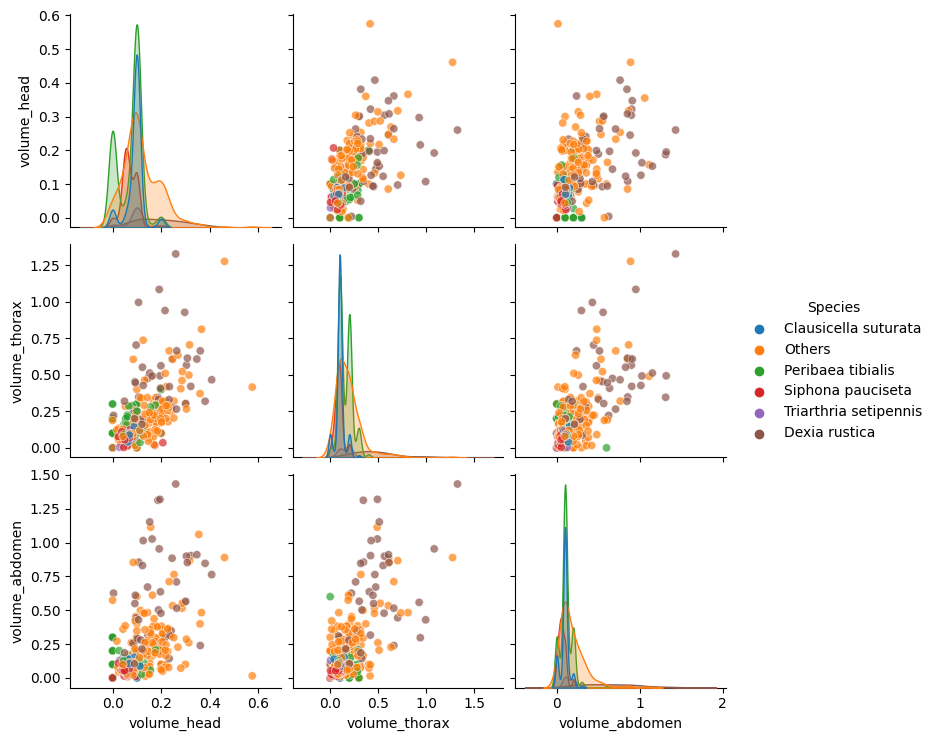

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to consider for pairwise scatter plots
cols = ["volume_head", "volume_thorax", "volume_abdomen"]

# Pairwise scatter plots using Seaborn
sns.pairplot(df_merged, hue="Species", vars=cols, plot_kws={'alpha':0.7})

# Display the plots
plt.show()